# Task 5

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [12]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

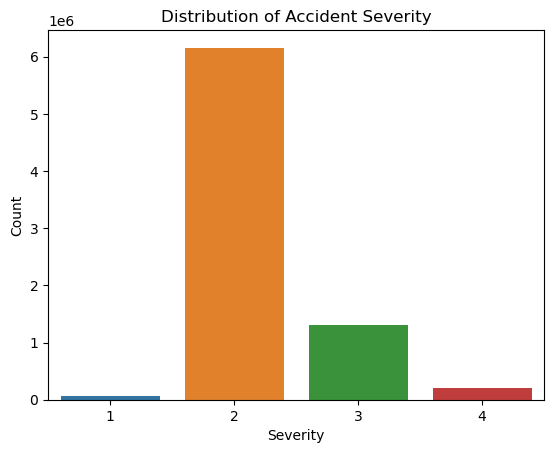

In [5]:
plt.figure()
sns.countplot(x='Severity', data=df)
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

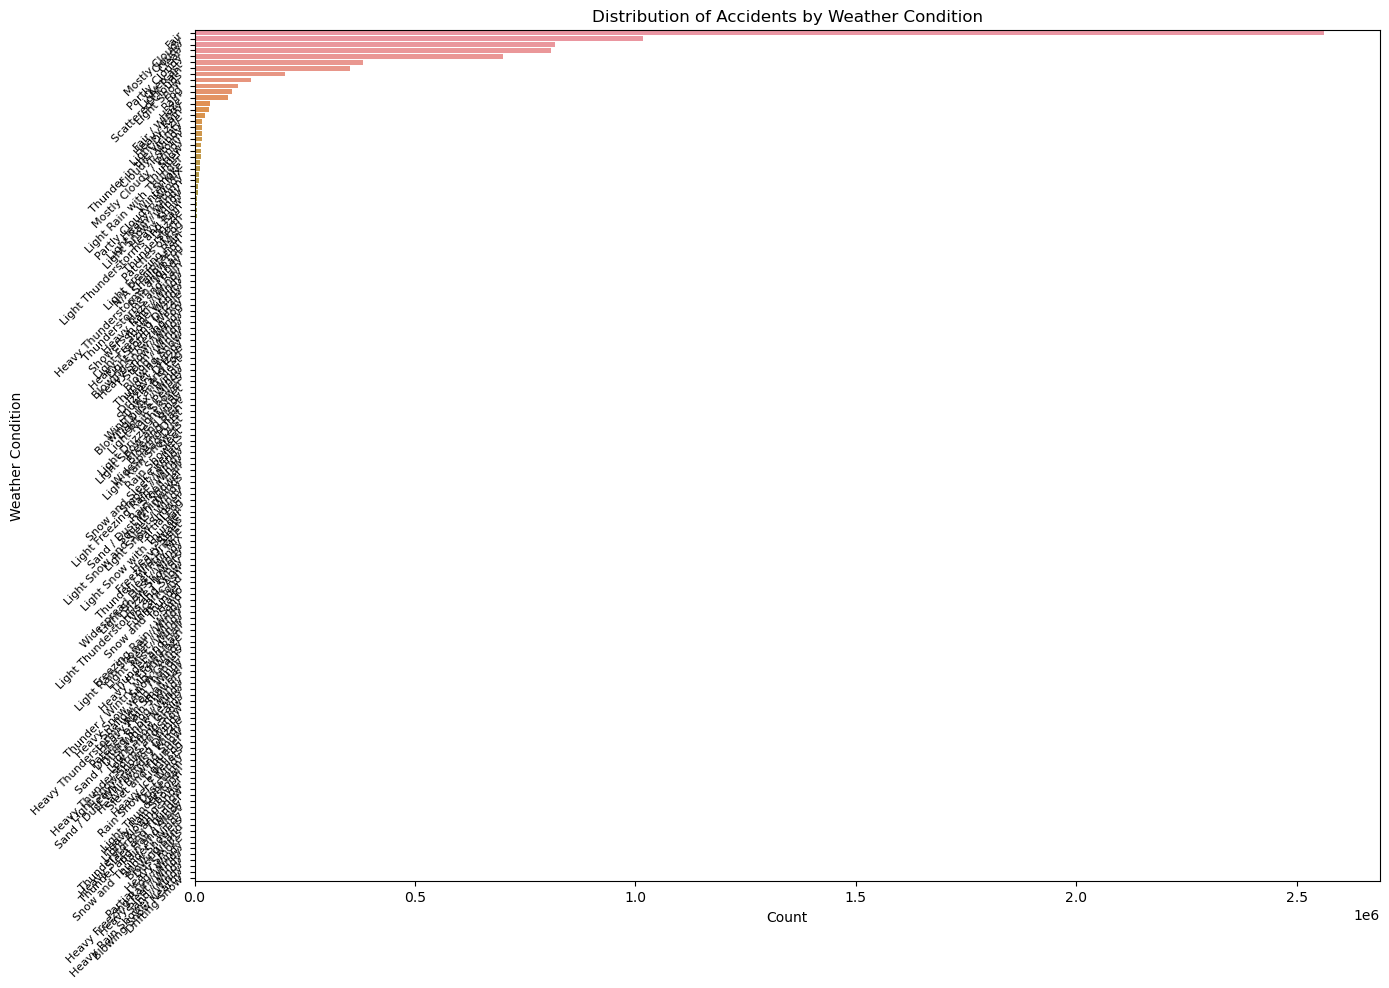

In [6]:
plt.figure(figsize=(14, 10))  
sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().index)
plt.title('Distribution of Accidents by Weather Condition')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.yticks(rotation=45, ha='right', fontsize = 8)  
plt.tight_layout() 
plt.show()

In [9]:
df['Start_Time'] = pd.to_datetime(df["Start_Time"], errors="coerce")
df['End_Time'] = pd.to_datetime(df["End_Time"], errors="coerce")
df["Year"]=df["Start_Time"].dt.year
df["Severity"]=df["Severity"].apply(lambda x : str(x))
df["Hour"]=df["Start_Time"].dt.hour
df["Month"]=df["Start_Time"].dt.month
df["Day"]=df["Start_Time"].dt.day_name()
df['Time_of_Year'] = df['Start_Time'].dt.quarter
df['Duration'] = df['End_Time'] - df['Start_Time']
df['Duration_in_minutes'] = df['Duration'].dt.total_seconds() / 60
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Hour,Month,Day,Time_of_Year,Duration,Duration_in_minutes
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,Night,Night,Night,2016.0,5.0,2.0,Monday,1.0,0 days 05:14:00,314.0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,Night,Night,Day,2016.0,6.0,2.0,Monday,1.0,0 days 00:30:00,30.0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,Night,Day,Day,2016.0,6.0,2.0,Monday,1.0,0 days 00:30:00,30.0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,Day,Day,Day,2016.0,7.0,2.0,Monday,1.0,0 days 00:30:00,30.0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,Day,Day,Day,2016.0,7.0,2.0,Monday,1.0,0 days 00:30:00,30.0


In [10]:
df.dtypes.value_counts()

object             20
float64            17
bool               13
datetime64[ns]      2
timedelta64[ns]     1
Name: count, dtype: int64

In [11]:
df.describe()

,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Hour,Month,Time_of_Year,Duration,Duration_in_minutes
count,6985228,6985228,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06,6.985228e+06,6.985228e+06,6.985228e+06,6.985228e+06,6985228,6.985228e+06
mean,2020-03-21 21:49:59.056443136,2020-03-22 04:56:51.646936064,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03,2.019701e+03,1.226779e+01,6.747753e+00,2.577515e+00,0 days 07:06:52.590491248,4.268765e+02
min,2016-01-14 20:18:33,2016-02-08 06:37:08,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,0.000000e+00,1.000000e+00,1.000000e+00,0 days 00:01:13,1.216667e+00
25%,2018-09-17 02:20:31.750000128,2018-09-17 05:23:37.500000,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00,2.018000e+03,8.000000e+00,4.000000e+00,2.000000e+00,0 days 00:30:00,3.000000e+01
50%,2020-06-23 13:37:23.500000,2020-06-23 15:20:42,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00,2.020000e+03,1.300000e+01,7.000000e+00,3.000000e+00,0 days 01:02:43,6.271667e+01
75%,2021-10-28 15:44:07,2021-10-29 14:57:46.500000,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00,2.021000e+03,1.700000e+01,1.000000e+01,4.000000e+00,0 days 02:02:38,1.226333e+02
max,2023-03-31 23:30:00,2023-03-31 23:59:00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01,2.023000e+03,2.300000e+01,1.200000e+01,4.000000e+00,1953 days 10:19:00,2.812939e+06
std,NaN,NaN,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01,1.888793e+00,5.455518e+00,3.623057e+00,1.157143e+00,9 days 04:43:47.830129335,1.324380e+04


<Axes: xlabel='Severity', ylabel='count'>

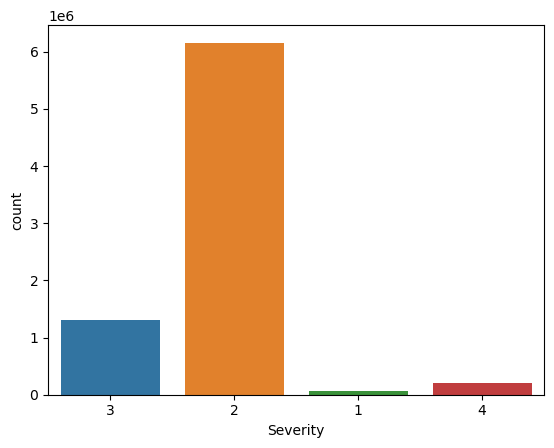

In [13]:
sns.countplot(data=df, x='Severity')

In [14]:
crosstab=pd.crosstab(df["Timezone"],df["Severity"])
crosstab

Severity,1,2,3,4
Timezone,,,,
US/Central,12367,1265804,333429,34016
US/Eastern,31740,2834077,584709,129641
US/Mountain,10119,341518,63699,16483
US/Pacific,13060,1708730,316807,24387


In [15]:
cities_by_accidents = df.City.value_counts().sort_values(ascending = False)
cities_by_accidents

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Bon Secour                           1
Sidney Center                        1
Fluker                               1
Mapleville                           1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

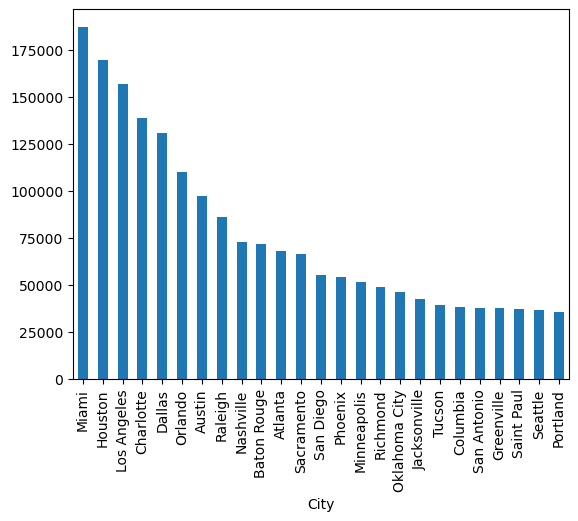

In [16]:
cities_by_accidents[:25].plot(kind = 'bar');
plt.xticks(rotation=90)
plt.show()

In [19]:
high_accident_cities = cities_by_accidents[cities_by_accidents >=1000];
low_accident_cities = cities_by_accidents[cities_by_accidents < 1000];
print("No. of cities with high accidents are {}".format(len(high_accident_cities)))
print("No. of cities with low accidents are {}".format(len(low_accident_cities)))


No. of cities with high accidents are 1218
No. of cities with low accidents are 12460


In [22]:
cities = df.City.unique()
len(cities)

13679

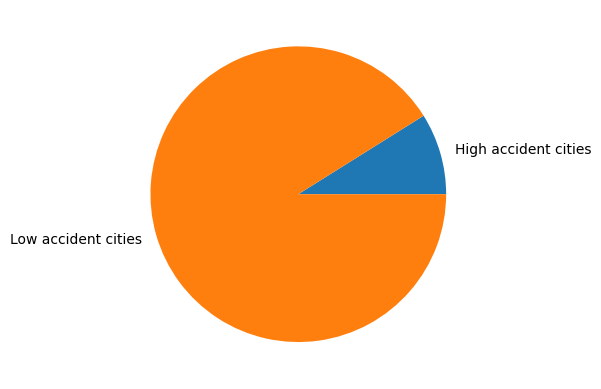

In [23]:
High_accident_zone = (len(high_accident_cities)/len(cities))*100
Low_accident_zone = (len(low_accident_cities)/len(cities))*100
y = np.array([High_accident_zone,Low_accident_zone])
mylabels = np.array(["High accident cities", "Low accident cities"])
plt.pie(y, labels = mylabels);
plt.show()

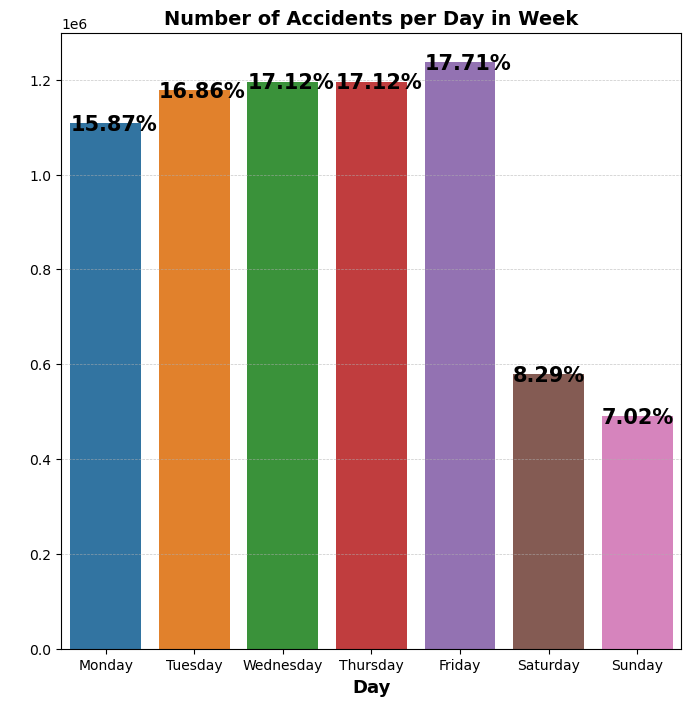

In [26]:
plt.figure(figsize=(8, 8))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=df["Day"], order=order)

total_counts = df["Day"].value_counts()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Day", fontsize=13, fontweight="bold")
plt.ylabel(" ")
plt.title("Number of Accidents per Day in Week", fontsize=14, fontweight="bold")
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    proportion = (total_counts[order[i]]/total_counts.sum()) * 100
    ax.text(
        bar.get_x(),  
        bar.get_height()-15000,  
        f'{proportion:.2f}%',
        fontsize=15,
        weight='bold',
        color='black'
    )
plt.show()

In [27]:
df["Is_Weekend"] = df["Day"].isin(["Saturday", "Sunday"])

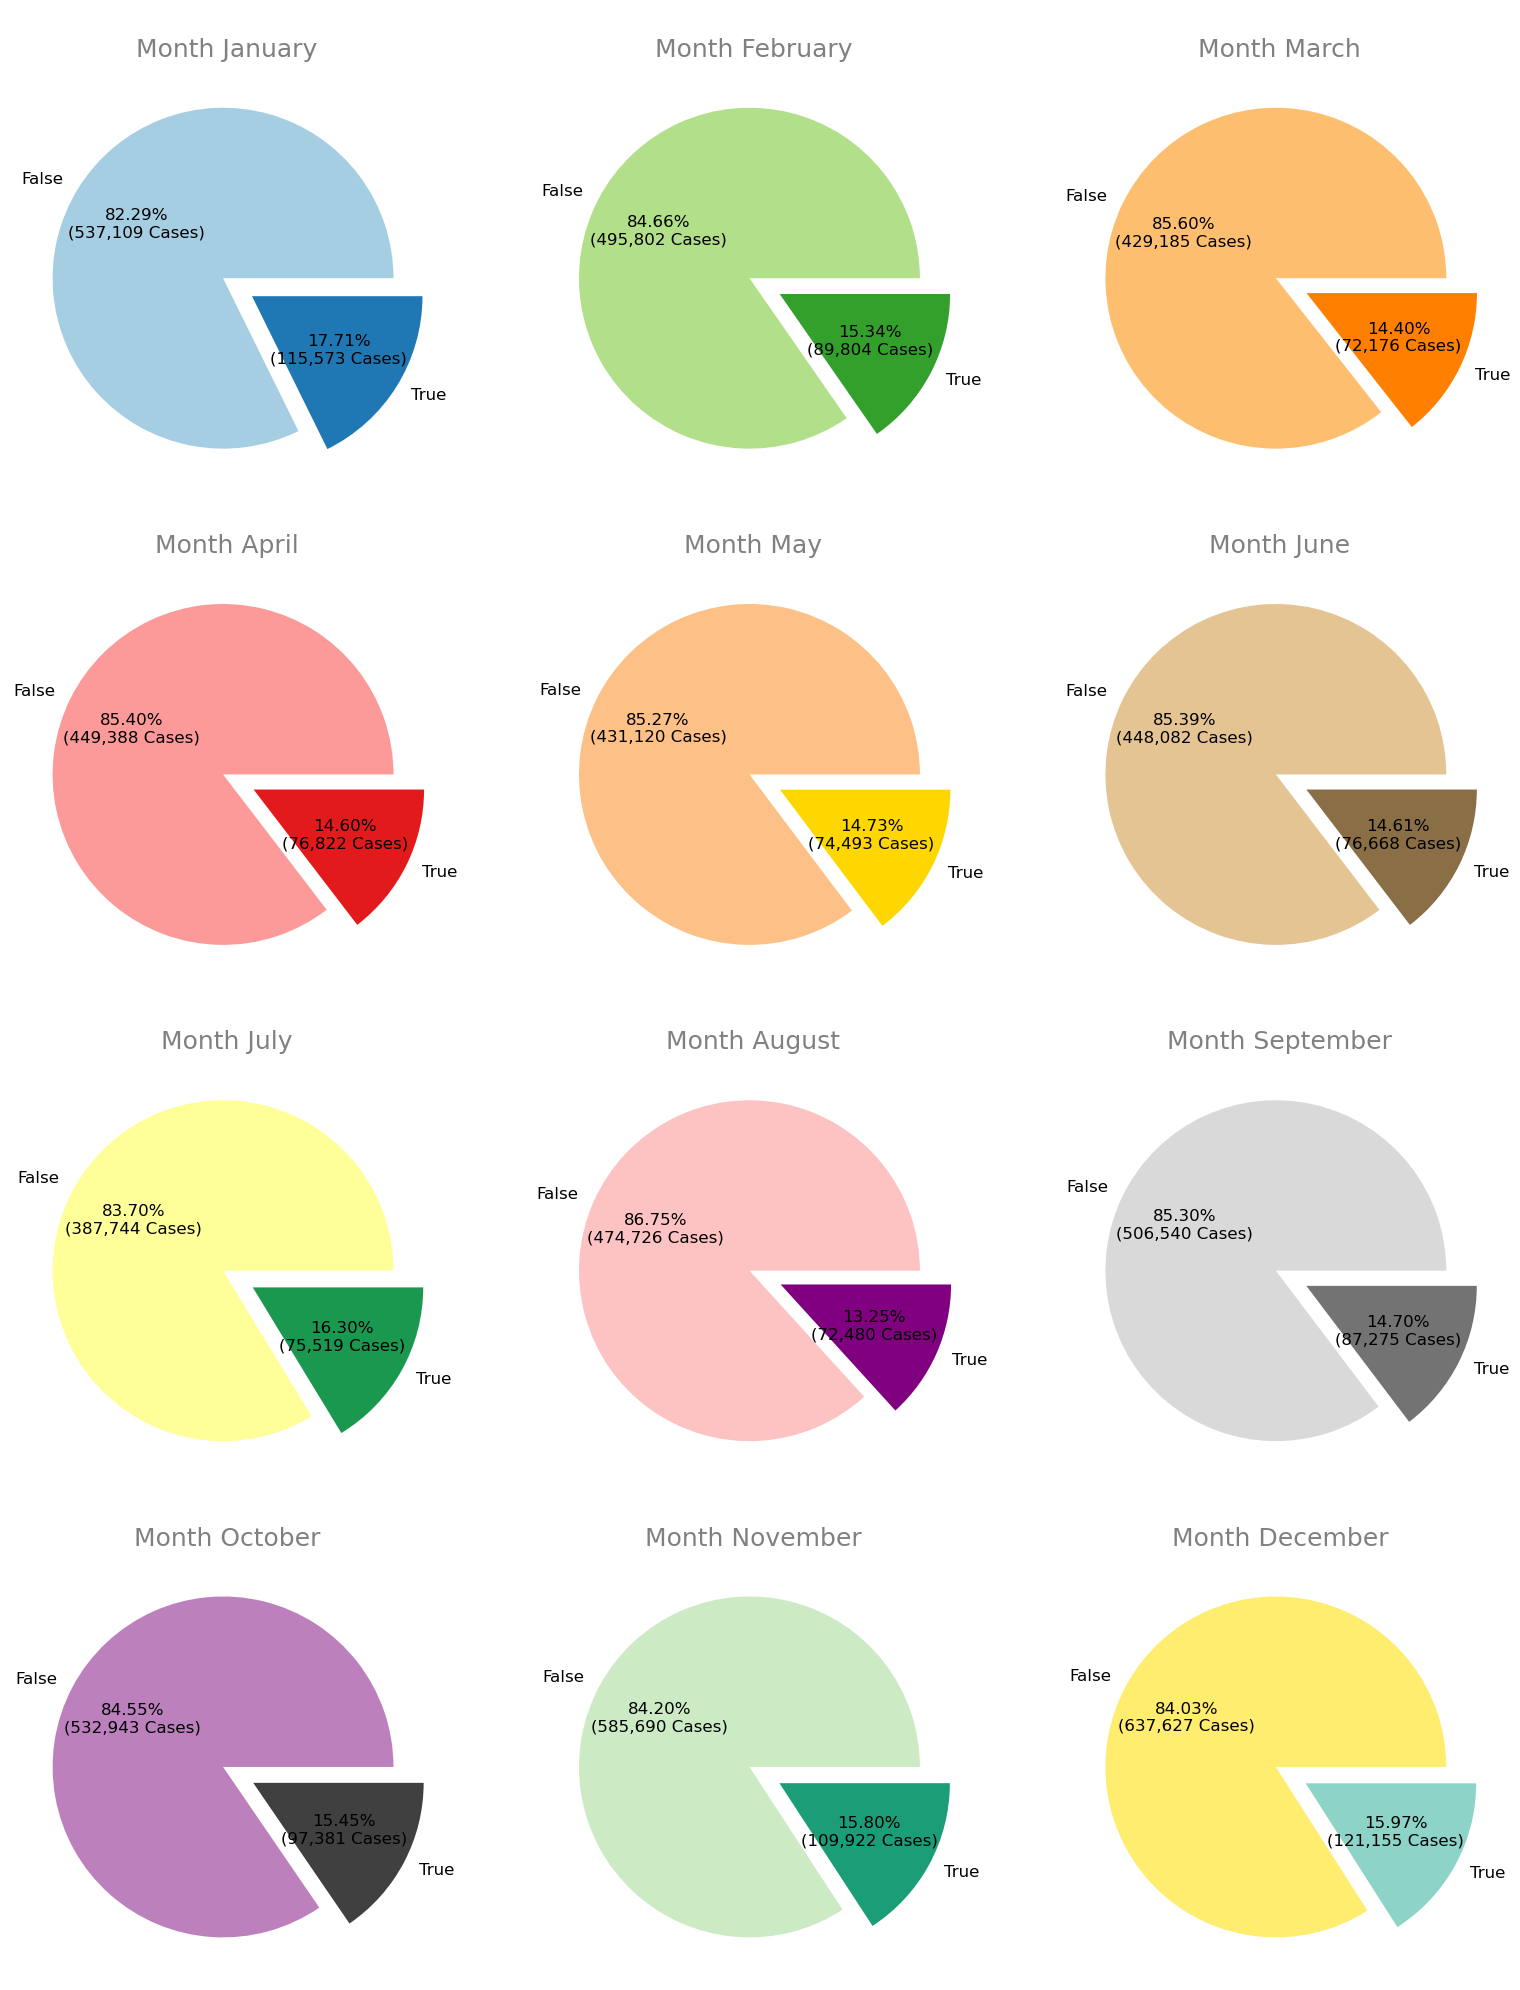

In [29]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 20))
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
colors = [('#A6CEE3', '#1F78B4'), ('#B2DF8A', '#33A02C'), ('#FDBF6F', '#FF7F00'), ('#FB9A99', '#E31A1C'),
          ('#FDC086', '#FFD700'), ('#E5C494', '#8A6E45'), ('#FFFF99', '#1A9850'), ('#FDC3C3', '#800080'),
          ('#D9D9D9', '#737373'), ('#BC80BD', '#404040'), ('#CCEBC5', '#1B9E77'), ('#FFED6F', '#8DD3C7')]
count = 0
def func(pct, allvals):
    absolute = int(round(pct / 100 * np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)
for i, ax in enumerate(axes.flatten()):
    month = i + 1
    size = list(df[df["Month"] == month]["Is_Weekend"].value_counts())
    if len(size) != 2:
        size.append(0)
    labels = ['False', 'True']
    ax.pie(size, labels=labels, colors=colors[count],
           autopct=lambda pct: func(pct, size), labeldistance=1.1,
           textprops={'fontsize': 12}, explode=[0, 0.2])
    title = '\n Month {}'.format(month_map[month])
    ax.set_title(title, fontsize=18, color='grey')
    count += 1
plt.tight_layout()
plt.show()

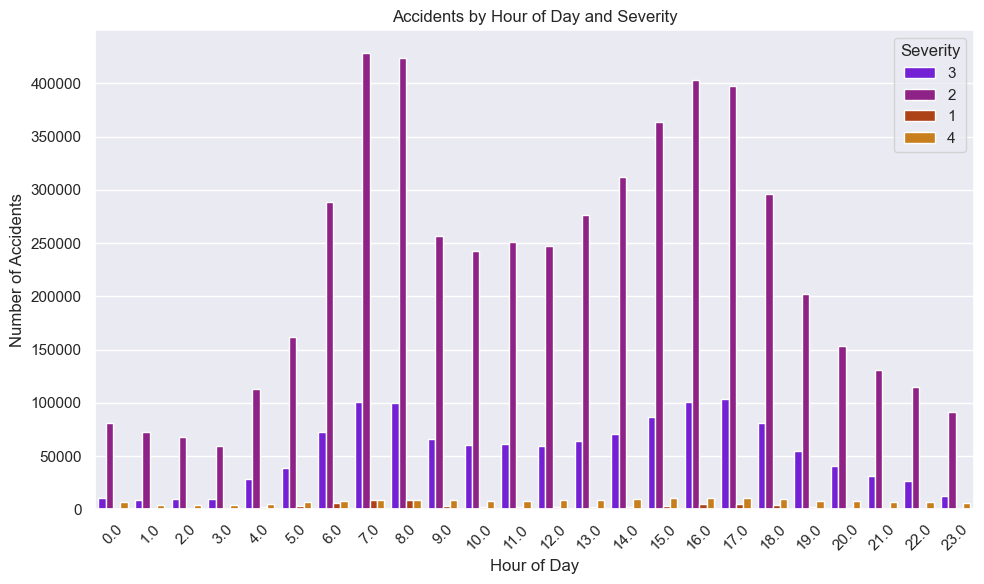

In [30]:
palette=sns.color_palette('gnuplot')
sns.set(style="darkgrid", palette="gnuplot", context="notebook",)

df['Hour_of_Day'] = df['Start_Time'].dt.hour

severity_hour_dataset = df[['Severity', 'Hour_of_Day']].copy()

plt.figure(figsize=(10, 6))
sns.countplot(data=severity_hour_dataset, x='Hour_of_Day', hue='Severity', palette='gnuplot')
plt.title('Accidents by Hour of Day and Severity')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
weather = df['Weather_Condition'].value_counts().sort_values(ascending = False).head(15)     
weather

Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Rain                  84331
Haze                  76223
Fair / Windy          35671
Heavy Rain            32309
Light Drizzle         22684
Name: count, dtype: int64

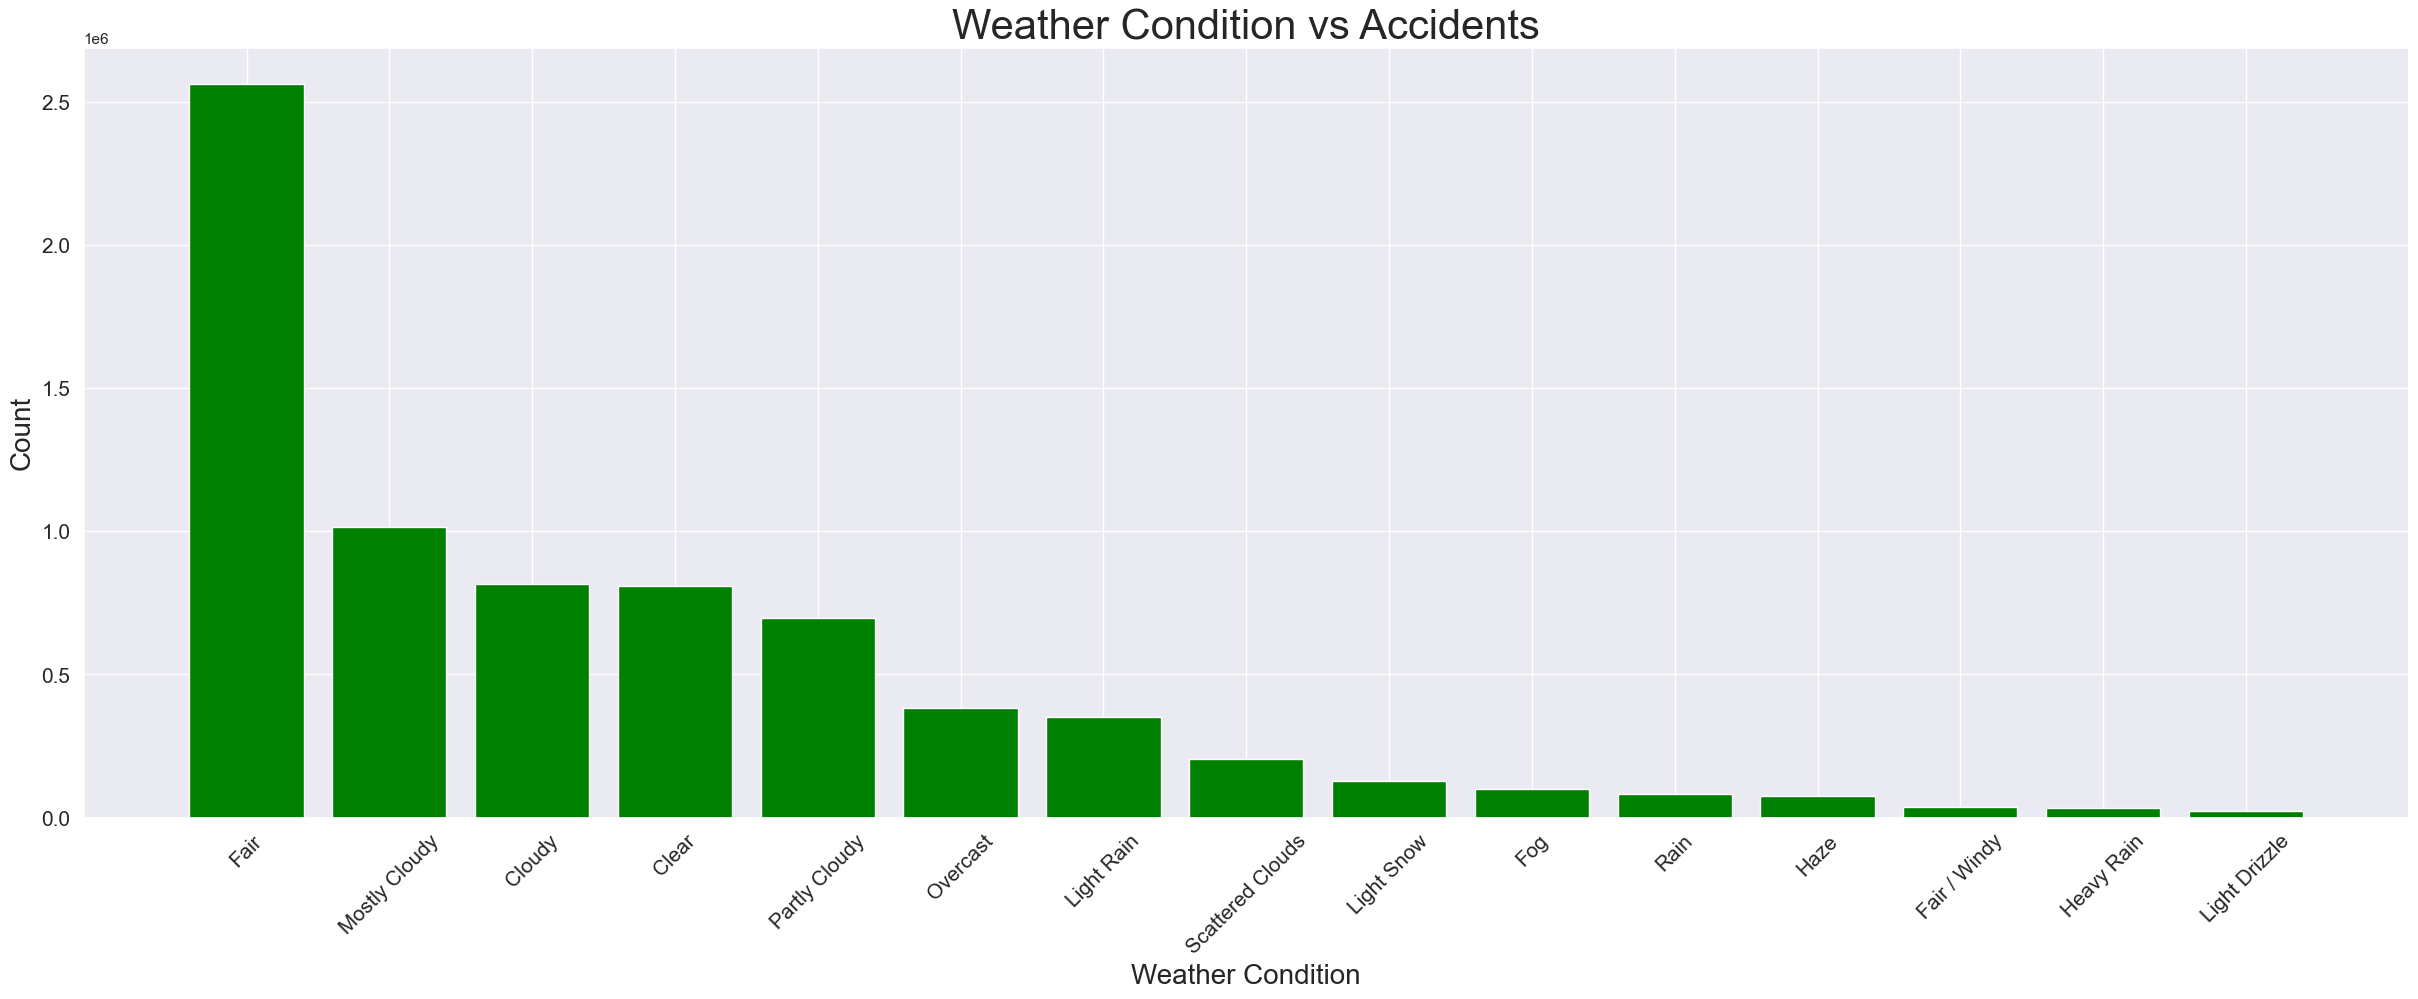

In [32]:
import random
figsize = (30, 10) 
Accident_Counts = weather.values
Weather_Conditions = weather.index
plt.figure(figsize=figsize)
plt.bar(Weather_Conditions, Accident_Counts,color='green')
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Weather Condition", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Weather Condition vs Accidents", fontsize = 30)
plt.show()